# 2.3 데이터 가져오기

## 2.3.1 기본 설정
기본 설정 부분은 책 번역자가 제공한 구글코랩 설정 코드를 참고하였습니다!

In [1]:
# 파이썬 임포트
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 임포트
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'end_to_end_project'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 2.3.2 데이터 다운로드

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

# 판다스를 사용하여 데이터를 읽는 함수를 아예 작성
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 2.3.3 데이터 구조 훑어보기

**head()** 로 처음 다섯 행 확인

In [5]:
housing = load_housing_data() # 앞에서 정의한 함수 활용
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**info()** 로 데이터에 대한 간략한 설명(전체 행 수, 각 특성의 데이터 타입, null이 아닌 값의 개수) 확인

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


위 데이터를 보면 다른 데이터들은 모두 20640개의 데이터를 가지고 있는데  
total_bedrooms에서만 20433개로 적은 것을 보아 여기에는 결측이 있다고 추론해볼 수 있음

또한 다른 특성들은 모두 float형인 반면  
ocean_proximity만 데이터 타입이 object인 것도 확인할 수 있음  
책에서는 앞서 head()에서 살펴봤을 때의 모습을 통해 ocean_proximity가  
범주형 데이터라고 추론할 수 있다고 함

**value counts()** 로 ocean_proximity에 어떤 카테고리가 있고, 각 카테고리에는 얼마나 많은 구역이 있는지 확인

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**describe()** 로 숫자형 특성의 요약 정보를 확인

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


위 결과를 보면 범주형 특성이었던 ocean_proximity는 자동으로 제외된 채 분석이 된 것을 확인할 수 있음

**std** : 표준편차(값이 퍼져 있는 정도)  
**25%, 50%, 75%** : 백분위수(percentile): 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값을 나타냄

그림 저장 attribute_histogram_plots


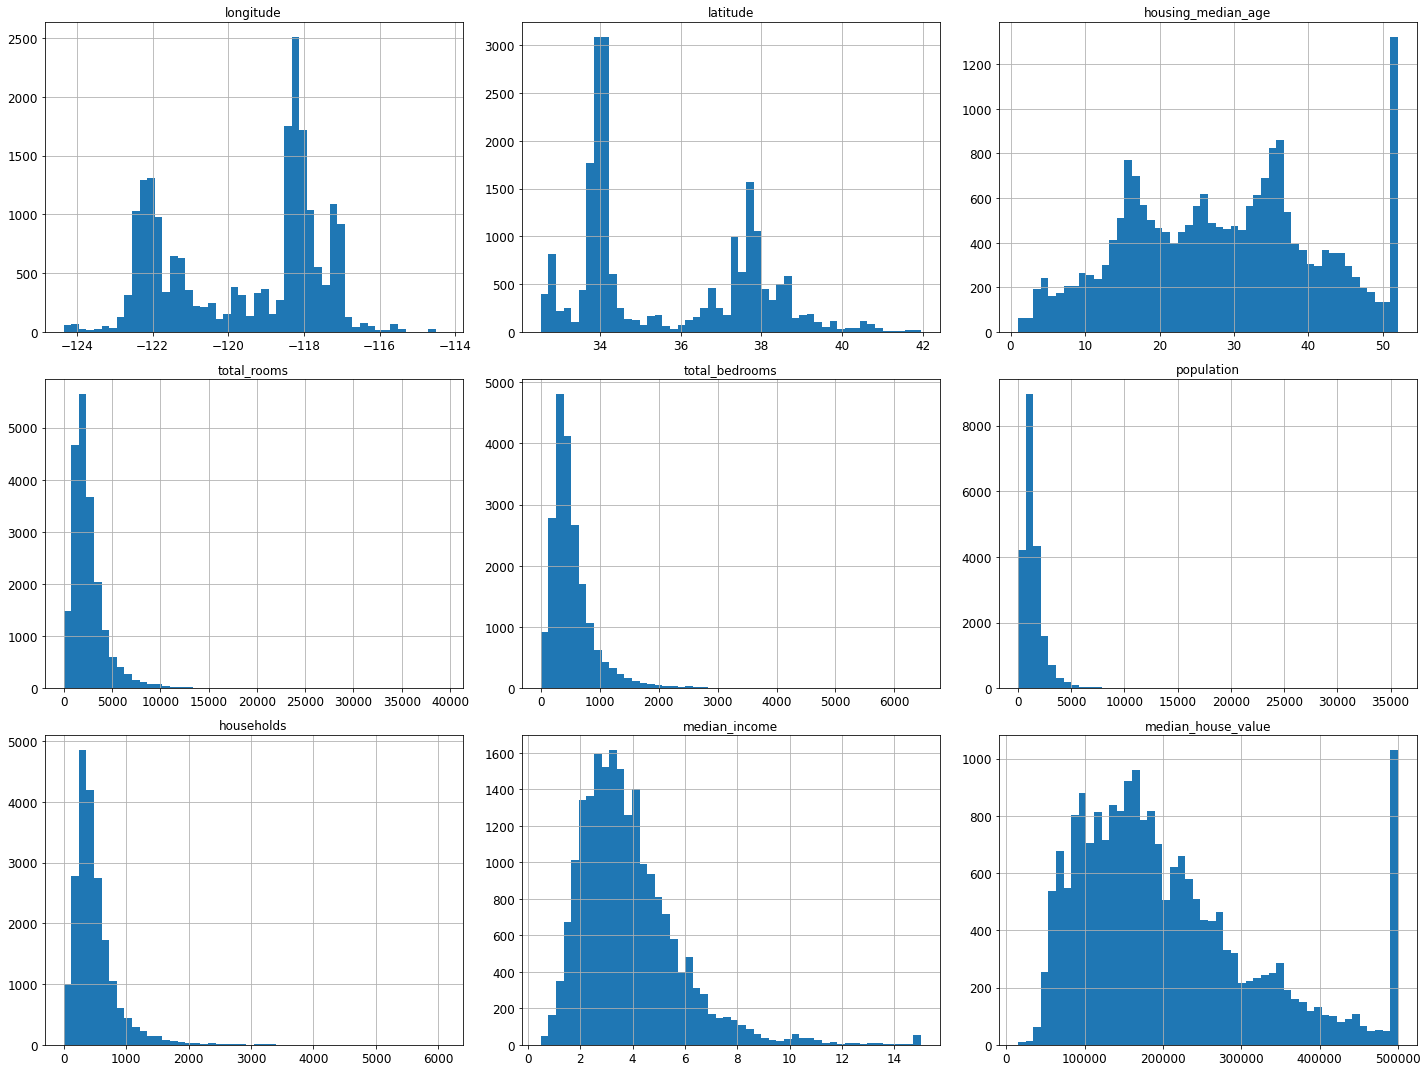

In [9]:
# import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig('attribute_histogram_plots')
plt.show()

## 2.3.4 테스트 세트 만들기

In [10]:
# 노트북과 실행 결과를 동일하게 맞추기 위해 랜덤시드를 특정 번호로 지정
np.random.seed(42)

In [11]:
# import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

In [13]:
print(len(train_set))
print(len(test_set))

16512
4128


각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트 세트로 보내는 방법 구현 코드(아래)  

주택 데이터셋에서는 식별자 컬럼이 없으므로 행의 인덱스를 ID로 사용

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index() # 'index' 열이 추가된 데이터프레임 반환
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

위도와 경도 값을 연결하여 아래와 같이 ID를 만들 수도 있음

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [17]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [18]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


사이킷런에서 제공하는 train_test_split이라는 함수로 train과 test를 만드는 방법도 있음(아래)  

**train_set_split()** 함수는 파이썬 리스트, 넘파이 배열, 판다스 데이터프레임과 판다스 시리즈(Series) 객체 등을 입력으로 받을 수 있음

<특징>
1. 난수 초깃값을 지정할 수 있는 random_state 매개변수 존재
2. 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있음(데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 때 매우 유용)

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [21]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


중간 소득(median_income)이 중간 주택 가격(median_house_value)을 예측하는 데 매우 중요하다고 가정.  
이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 함(즉 계층적 샘플링(=테스트 세트가 전체 데이터셋을 잘 대표하도록 각 계층에서 올바른 수의 샘플을 추출하는 방법)이 필요!)  

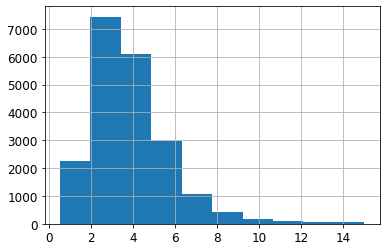

In [22]:
housing['median_income'].hist();

이를 위해 **pd.cut()** 함수를 사용해 카테고리 5개를 가진 소득 카테고리 특성을 만듦(1에서 5까지의 레이블을 가짐)  
ex) 카테고리1: 0 ~ 1.5, 카테고리2: 1.5 ~ 3 ...

In [23]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                              labels=[1, 2, 3, 4, 5])

value_counts() 와 hist() 로 확인

In [24]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

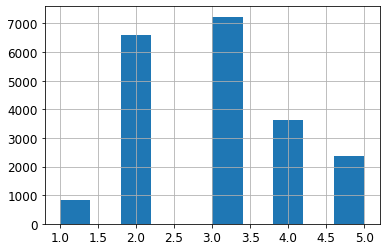

In [25]:
housing["income_cat"].hist();

이제 사이킷런의 **StratifiedShuffleSplit()** 함수를 사용하여 소득 카테고리를 기반으로 계층 샘플링 작업 시작

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

테스트 세트에서 소득 카테고리의 비율 확인

In [27]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

동일한 코드로 전체 데이터셋에 있는 소득 카테고리의 비율 확인

In [28]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

위 두 결과를 비교하면 비율이 거의 비슷하게 잘 들어갔음을 확인 가능! 

계층 샘플링(Stratified)과 순수 무작위 샘플링(Random) 중 어느 것을 시행했을 때 더 전체 데이터셋의 소득 카테고리의 비율과 비슷한지 확인하기 위한 코드(아래)

In [29]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing), 
    "Stratified": income_cat_proportions(strat_test_set), 
    "Random": income_cat_proportions(test_set)
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


계층 샘플링(Stratified)을 사용해 만든 테스트 세트는 전체 데이터셋(Overall)에 있는 소득 카테고리의 비율과 거의 같은 반면,  
일반 무작위 샘플링(Random)으로 만든 테스트 세트는 비율이 많이 달라졌음을 확인 가능

마지막으로 income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌려놓기(아래)

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 2.4 데이터 이해를 위한 탐색과 시각화

훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용

In [32]:
housing = strat_train_set.copy()

## 2.4.1 지리적 데이터 시각화

위도와 경도라는 지리 정보가 있으니 위도와 경도에 따라 모든 구역을 나타내는 산점도로 데이터 시각화

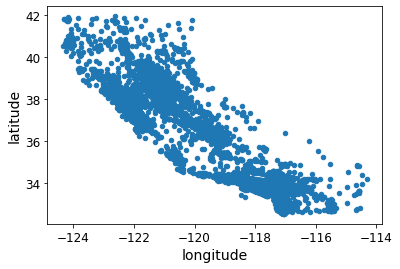

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude");

위 그림만 가지고는 어떤 특별한 패턴을 찾기 힘드므로 alpha 옵션을 0.1로 주어 데이터 포인트가 밀집된 영역을 시각화

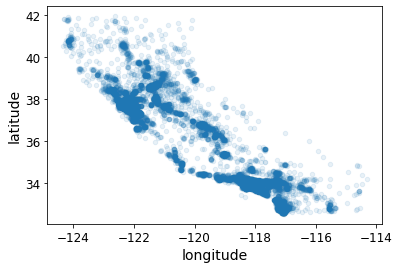

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

<위 그래프를 통해 밀집된 지역 파악>
* 베이 에어리어(Bay area): 해변을 따라 경도 -122도 근처
* 로스앤젤레스(Los Angeles): 해변을 따라 경도 -118도 근처
* 샌디에고(San Diego): 해변을 따라 경도 -117도 근처
* 센트럴 밸리(Central Valley): 캘리포니아 중앙부에 길게 뻗은 지역
* 새크라멘토(Sacramento): 위도 38.5도, 경도 -121.5도 근처
* 프레즈노(Fresno): 위도 36.7도, 경도 -119.8도 근처

이제 주택 가격을 산점도로 시각화
* 매개변수 s: 구역의 인구(원의 반지름으로 표현)
* 매개변수 c: 가격(색상으로 표현)
* 매개변수 cmap: jet이라는 색상표 사용(파란색: 낮은 가격, 빨간색: 높은 가격)

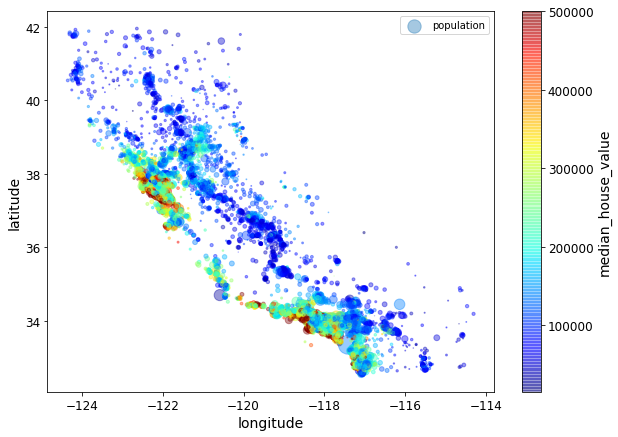

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing["population"]/100, label="population", figsize=(10,7), 
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
            sharex=False)
plt.legend();

<위 그래프를 통해 주택 가격의 분포 패턴 해석>
주택 가격은 지역(바다와 인접한 곳일수록 비쌈)과 인구 밀도(밀집한 지역일수록 비쌈)와 관련이 크다는 사실을 알 수 있음

이를 실제 캘리포니아 지도의 이미지를 다운받아 배경으로 해놓고 보면 더 제대로된 시각화 가능(아래)

In [36]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1d731ba5f70>)

그림 저장 california_housing_prices_plot


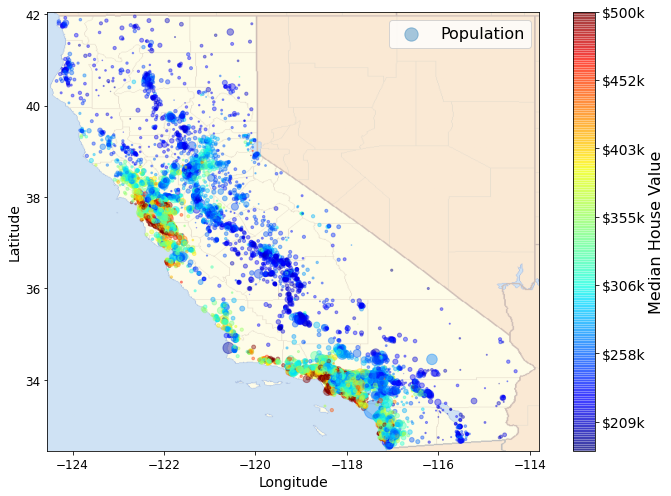

In [37]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## 2.4.2 상관관계 조사

데이터셋이 너무 크지는 않으므로 모든 특성 간의 **표준 상관계수(standard correlation coefficient, Pearson's r)** 를 **corr()** 매서드를 이용해 계산

In [38]:
corr_matrix = housing.corr()

In [39]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

상관계수의 범위: -1 ~ +1
계수가 1에 가까우면 강한 양의 상관관계 ex) median_income(0.687160)
계수가 양수이면서 0에 가까워질수록 약한 양의 상관관계
계수가 -1에 가까우면 강한 음의 상관관계
계수가 음수이면서 0에 가까워질수록 약한 음의 상관관계

위키백과에 있는 피어슨의 상관계수 이미지 참고!

중간 주택 가격과 상관관계가 높아 보이는 특성 몇 개만 추려서 숫자형 특성 사이에 산점도를 그려주는 판다스의 **scatter_matrix** 함수 사용

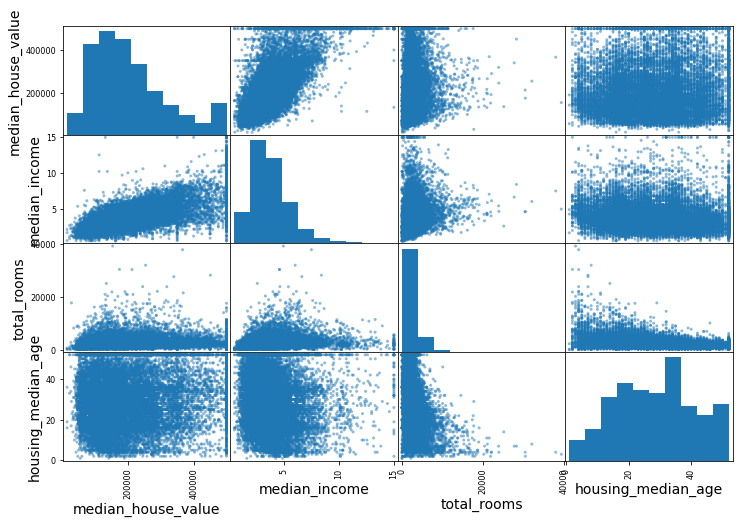

In [40]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
            "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

중간 주택 가격(median_house_value)을 예측하는 데 가장 유용할 것 같은 특성은 중간 소득(median_income)이므로 그 부분만 확대해서 따로 출력

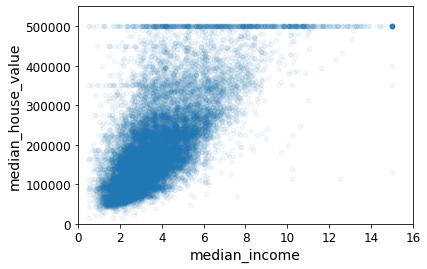

In [41]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
            alpha=0.05)
plt.axis([0, 16, 0, 550000]);

<위 그래프로부터 알 수 있는 사실>
1. 강한 양의 상관관계를 지님
2. 가격 제한값이 $500,000에서 수평선으로 잘 보임 -> 알고리즘 데이터에서는 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋음

## 2.4.3 특성 조합으로 실험

그 자체로는 유용해보이지 않는 특성들은 서로 조합해서 여러 특성의 조합을 시도해보는 것도 좋은 방법

In [42]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] # 가구당 방 개수
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # 방당 침실의 개수
housing["population_per_household"] = housing["population"]/housing["households"] # 가구당 인원 수

다시 상관관계 행렬을 확인

In [43]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

새로 만든 변수들(rooms_per_household, population_per_household, bedrooms_per_room)은 확실히 기존에 있던 변수들보다 상대적으로 강한 상관관계를 나타내고 있음  

본격적으로 머신러닝 분석 전 현재 housing 데이터를 점검하면 아래와 같음

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 2.5 머신러닝 알고리즘을 위한 데이터 준비

머신러닝 알고리즘을 위해 데이터를 준비할 때, 이 준비 작업을 수동으로 하는 대신 함수를 만들어 자동화해야 하는 이유
* 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있음( ex. 다음번에 새로운 데이터셋을 사용할 때)
* 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축하게 됨
* 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는 데 이 함수를 사용할 수 있음
* 여러 가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 갖아 좋은지 확인하는 데 편리함

우선 원래 훈련 세트로 복원하고(**strat_train_set** 을 다시 한 번 복사),  
예측 변수와 타겟값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리함(**drop()** 은 데이터 복사본을 만들며 **strat_train_set** 에는 영향을 주지 않음)

In [45]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## 2.5.1 데이터 정제

책에 소개된 데이터 정제 옵션 3가지를 살펴보기 위해 주택 데이터셋의 복사본을 만들어서 살펴볼 것임.  
이 때 적어도 하나의 열이 비어있는 행을 고르기 위해 **isnull().any(axis=1)** 옵션 사용

In [46]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


### 옵션 1. 해당 구역을 제거하는 방법: dropna()

In [47]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


### 옵션 2. 전체 특성을 삭제하는 방법: drop()

In [48]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


### 옵션 3. 다른 값으로 결측을 채우는 방법: fillna()

In [49]:
# median 사용
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [50]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


### 옵션 4. 사이킷런의 SimpleImputer를 사용하는 방법

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # 여기서도 median 사용

중간값(median)이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성인 ocean_proximity를 삭제

In [52]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

이제 imputer 객체의 **fit()** 메서드를 사용해 훈련 데이터에 적용 가능

In [53]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

imputer는 각 특성의 중간값(median)을 계산해서 그 결과를 객체의 **statistics_** 속성에 저장함  
**total_bedrooms** 특성에만 누락된 값이 있지만 추후 새로 들어온 데이터에서는 어떤 값이 누락될지 확신할 수 없으므로 모든 수치형 특성에 imputer를 적용하는 것이 바람직함

In [54]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [55]:
# 위의 각 특성의 중간값이 수동으로 계산한 아래와 같은지 확인
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

이제 학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있게 됨

In [56]:
X = imputer.transform(housing_num)

위 결과는 변형된 특성들이 들어있는 평범한 numpy 배열임.  
이를 다시 pandas dataframe으로 간단히 되돌릴 수 있음(아래)

In [57]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                         index=housing_num.index)

In [58]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [59]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [60]:
imputer.strategy

'median'

## 2.5.2 텍스트와 범주형 특성 다루기

지금까지는 수치형 특성만 다루었기 때문에 이제는 범주형 특성인 **ocean_proximity** 를 전처리

In [61]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


대부분의 머신러닝 알고리즘은 숫자를 다루므로 위 카테고리를 텍스트에서 숫자로 변환해야 함  
이를 위해 사이킷런의 **OrdinalEncoder** 클래스를 사용

In [62]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

**categories_** 인스턴스 변수를 사용해 카테고리 목록을 얻을 수 있음  
    범주형 특성마다 카테고리들의 1D 배열을 담은 리스트가 반환됨

In [63]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

사이킷런은 범주의 값을 원-핫 벡터로 바꾸기 위한 **OneHotEncoder** 클래스를 제공

In [64]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**OneHotEncoder**는 기본적으로 희소행렬(sparse matrix)을 반환함  
이것을 밀집된 넘파이 배열로 바꾸려면 **toarray()** 메서드를 사용하면 됨

In [65]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

또는 **OneHotEncoder** 를 만들 때 sparse=False로 지정할 수 있음

In [66]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 2.5.3 나만의 변환기

추가 특성을 위해 사용자 정의 변환기를 아래와 같이 만들 수 있음

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # 더 할 일이 없습니다
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

책에서는 위처럼 인덱스(3,4,5,6)를 하드코딩했지만 아래처럼 동적으로 처리하는 것이 더 좋음

In [69]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

또한 **housing_extra_attribs**는 넘파이 배열이기 때문에 열 이름이 없음(안타깝게도 사이킷런을 사용할 때 생기는 문제) 그래서 head()를 해보면 아래와 같이 에러가 남

In [70]:
housing_extra_attribs.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

이것을 DataFrame으로 복원하려면 아래와 같이 하면 됨

In [71]:
housing_extra_attribs = pd.DataFrame(
housing_extra_attribs, 
columns=list(housing.columns)+["rooms_per_household", "population_per_household"], 
index=housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


## 2.5.4 특성 스케일링

머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않음  
따라서 특성 스케일링(feature scaling)을 해주어야 함  

모든 특성의 범위를 같도록 만들어주는 방법으로 **min-max 스케일링(정규화(normalization))**과 **표준화(standardization)**가 널리 사용됨  
* **min-max 스케일링(정규화(normalization))**: 사이킷런의 **MinMaxScaler** 변환기로 가능  
* **표준화(standardization)**: 사이킷런의 **StandardScaler** 변환기로 가능

## 2.5.5 변환 파이프라인

수치형 특성을 전처리하기 위해 사이킷런에서 연속된 변환을 순서대로 처리할 수 있도록 도와주는 **Pipeline** 클래스로 파이프라인을 만듦

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([ 
    ('imputer', SimpleImputer(strategy="median")), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()), 
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [73]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

지금까지는 범주형 열과 수치형 열을 각각 다루었는데 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리할 수 있게 사이킷런의 **ColumnTransformer** 클래스를 사용하여 주택 가격 데이터에 전체 변환을 아래와 같이 적용할 수 있음

In [74]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs), 
])

housing_prepared = full_pipeline.fit_transform(housing)

In [75]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [76]:
housing_prepared.shape

(16512, 16)

# 2.6 모델 선택과 훈련

## 2.6.1 훈련 세트에서 훈련하고 평가하기

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [79]:
# 훈련 샘플 앞부분 5개를 사용해 전체 파이프라인을 적용
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


위 값을 실제값과 비교

In [80]:
print("레이블:", list(some_labels))

레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [81]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

사이킷런의 **mean_squared_error**로 linear regression의 RMSE 값을 구할 수 있음

In [82]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

사이킷런의 **mean_absolute_error**로는 MAE 값을 구할 수 있음

In [83]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

**DecisionTreeRegressor**로 훈련, 이 모델은 강력하고 데이터에서 복잡한 비선형 관계를 찾을 수 있음

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

앞서 모델을 훈련시켰으니, 이제는 훈련 세트로 평가

In [85]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

RMSE가 0.0이 나왔지만 이는 모델이 데이터에 과(대)적합된 것일수도 있으므로 이를 확인하기 위해 훈련 세트의 일부분으로 훈련을 하고 다른 일부분으로 검증하는 방법을 사용

## 2.6.2 교차 검증을 사용한 평가

사이킷런에서 k-겹 교차 검증(k-fold cross-validation) 기능을 수행하는 **cross_val_score**을 사용

In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [88]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준편차: 2439.4345041191004


교차 검증으로 모델의 성능을 추정하는 것뿐만 아니라 이 추정이 얼마나 정확한지(즉, 표준편차)를 측정할 수 있음  
결과를 보면 결정 트리의 결과가 이전만큼 좋아 보이진 않음(실제로 선형 회귀 모델보다 나쁨)  
비교를 위해 선형 회귀 모델의 점수를 계산해보았음(아래)

In [89]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준편차: 2731.6740017983384


결과를 보면 결정 트리 모델이 과(대)적합되어 선형 회귀 모델보다 성능이 나쁨을 알 수 있음

마지막으로 사이킷런의 **RandomForestRegressor**를 사용하는 앙상블 학습 모델을 하나 더 시도해보겠음

In [90]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [91]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [93]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준편차: 2097.0810550985693


랜덤 포레스트 모델도 훌륭해보이나, 훈련 세트에 대한 점수가 검증 세트에 대한 점수보다 훨씬 낮으므로 이 모델도 여전히 훈련 세트에 과(대)적합되어 있음을 알 수 있음

사이킷런에서 제공하는 SVM 모델인 **SVR**로도 같은 과정을 해볼 수 있음

In [94]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

# 2.7 모델 세부 튜닝

가능성 있는 모델들을 추렸다고 가정하면 이제 이 모델들을 세부 튜닝해야 함

## 2.7.1 그리드 탐색

사이킷런의 **GridSearchCV** 를 사용하여 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정하면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가할 수 있음

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어남
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

최상의 파라미터 조합은 아래와 같음

In [97]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

최적의 추정기에 직접 접근도 가능

In [98]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

평가 점수도 직접 확인 가능

In [100]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

위 수치들을 보면 **max features** 하이퍼파라미터가 8, **n_estimators** 하이퍼파라미터가 30일 때 최적의 솔루션임을 알 수 있음(점수가 작을수록 좋은 것)  
이때 RMSE 점수가 49,682로 앞서 기본 하이퍼파라미터 설정으로 얻은 50,182보다 조금 더 좋음

In [101]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083686,0.029999,0.005866,0.004345,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.188541,0.006073,0.009827,0.000520,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.596701,0.030972,0.028391,0.001021,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.130571,0.044346,0.005151,0.002267,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.350544,0.053694,0.010894,0.001610,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.966958,0.100436,0.028739,0.002510,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.123275,0.003162,0.003822,0.000269,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.434359,0.041555,0.011438,0.001841,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.243435,0.056708,0.029183,0.003168,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.213726,0.012625,0.005016,0.000620,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


## 2.7.2 랜덤 탐색

하이퍼파라미터 탐색 공간이 커지면 사이킷런의 **RandomizedSearchCV**를 사용하는 것이 더 좋음  
**RandomizedSearchCV**sms **GridSearchCV**와 거의 같은 방식으로 작동하지만 가능한 모든 조합을 시도했던 **GridSearchCV**와 달리 **RandomizedSearchCV**는 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가함  
**RandomizedSearchCV** 방식의 주요 장점은 아래와 같음
* 랜덤 탐색을 1000회 반복하도록 실행하면 하이퍼파라미터마다 각기 다른 1000개의 값을 탐색함(그리드 탐색에서는 하이퍼파라미터마다 몇 개의 값만 탐색함)
* 단순히 반복 횟수를 조절하는 것만으로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원을 제어할 수 있음

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D72FC342B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D7305F65B0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [103]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


## 2.7.3 앙상블 방법

모델을 세밀하게 튜닝하는 또다른 방법은 최상의 모델을 연결해보는 것.  
이 주제는 7장에서 자세히 살펴본다고 함

## 2.7.4 최상의 모델과 오차 분석

최상의 모델을 분석하면 문제에 대한 좋은 통찰을 얻는 경우가 많음

In [104]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

중요도 다음에 그에 대응하는 특성 이름을 표시하면 아래와 같음

In [105]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

이 정보를 바탕으로 덜 중요한 특성들을 제외할 수 있음(ex. ocean_proximity 카테고리 중 하나만 실제로 유용하므로 다른 카테고리는 제외할 수 있음)

## 2.7.5 테스트 세트로 시스템 평가하기

어느 정도 모델을 튜닝하면 드디어 만족할 만한 모델을 얻게 되고, 이제 테스트 세트에서 최종 모델을 평가할 차례임  
테스트 세트에서 예측 변수와 레이블을 얻은 후 **full_pipeline**을 사용해 데이터를 변환하고(테스트 세트에서 훈련하면 안되므로 fit_transform()이 아니라 **transform()**을 호출해야 함!) 테스트 세트에서 최종 모델을 평가함

In [106]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [107]:
final_rmse

47730.22690385927

**scipy.stats.t.interval()**을 사용해 테스트 RMSE에 대한 95% 신뢰 구간을 계산할 수 있음(아래)

In [108]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

위 과정을 아래와 같이 수동으로 계산할 수도 있음

In [109]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45685.10470776, 49691.25001877858)

또는 t-score 대신 z-score을 사용할 수도 있음

In [110]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136455, 49690.68623889413)

# END